# Olele - Review Analysis
https://www.etsy.com/shop/Olele

## Import the data

In [2]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
olele = pd.read_csv("olele-reviews-all.csv", usecols=["name_date", "text"])
olele

,name_date,text
0,"Carolinaon Nov 1, 2022",As usual the quality is sturdy yet elegant and...
1,"Amy Annetteon Sep 3, 2022",I bought this fan to bring to tango and swing ...
2,"Maryon Aug 31, 2022",LOVELY! I think this is my 4th fan? Complimen...
3,"Eni Aon Aug 31, 2022","Very beautiful fan, great quality and the colo..."
4,"hredmondson Jun 11, 2022",This is the second fan I've bought for myself ...
...,...,...
321,"Anonymous on Jun 18, 2010",Gorgeous! Love it! Just in time for the summer...
322,"Anonymous on Jun 15, 2010",Really nice communication with Karmele Luqui. ...
323,"Anonymous on Jun 12, 2010",A huge WOW when I just got them! The fans are ...
324,"Anonymous on Jun 12, 2010",A huge WOW when I just got them! The fans are ...


## Data processing

In [4]:
# Split name and date
olele[["name", "date"]] = olele["name_date"].str.split(pat="on ", expand=True)
olele

,name_date,text,name,date
0,"Carolinaon Nov 1, 2022",As usual the quality is sturdy yet elegant and...,Carolina,"Nov 1, 2022"
1,"Amy Annetteon Sep 3, 2022",I bought this fan to bring to tango and swing ...,Amy Annette,"Sep 3, 2022"
2,"Maryon Aug 31, 2022",LOVELY! I think this is my 4th fan? Complimen...,Mary,"Aug 31, 2022"
3,"Eni Aon Aug 31, 2022","Very beautiful fan, great quality and the colo...",Eni A,"Aug 31, 2022"
4,"hredmondson Jun 11, 2022",This is the second fan I've bought for myself ...,hredmonds,"Jun 11, 2022"
...,...,...,...,...
321,"Anonymous on Jun 18, 2010",Gorgeous! Love it! Just in time for the summer...,Anonymous,"Jun 18, 2010"
322,"Anonymous on Jun 15, 2010",Really nice communication with Karmele Luqui. ...,Anonymous,"Jun 15, 2010"
323,"Anonymous on Jun 12, 2010",A huge WOW when I just got them! The fans are ...,Anonymous,"Jun 12, 2010"
324,"Anonymous on Jun 12, 2010",A huge WOW when I just got them! The fans are ...,Anonymous,"Jun 12, 2010"


In [5]:
# Convert date to datetime type
olele["datetime"] = pd.to_datetime(olele["date"])
olele

,name_date,text,name,date,datetime
0,"Carolinaon Nov 1, 2022",As usual the quality is sturdy yet elegant and...,Carolina,"Nov 1, 2022",2022-11-01
1,"Amy Annetteon Sep 3, 2022",I bought this fan to bring to tango and swing ...,Amy Annette,"Sep 3, 2022",2022-09-03
2,"Maryon Aug 31, 2022",LOVELY! I think this is my 4th fan? Complimen...,Mary,"Aug 31, 2022",2022-08-31
3,"Eni Aon Aug 31, 2022","Very beautiful fan, great quality and the colo...",Eni A,"Aug 31, 2022",2022-08-31
4,"hredmondson Jun 11, 2022",This is the second fan I've bought for myself ...,hredmonds,"Jun 11, 2022",2022-06-11
...,...,...,...,...,...
321,"Anonymous on Jun 18, 2010",Gorgeous! Love it! Just in time for the summer...,Anonymous,"Jun 18, 2010",2010-06-18
322,"Anonymous on Jun 15, 2010",Really nice communication with Karmele Luqui. ...,Anonymous,"Jun 15, 2010",2010-06-15
323,"Anonymous on Jun 12, 2010",A huge WOW when I just got them! The fans are ...,Anonymous,"Jun 12, 2010",2010-06-12
324,"Anonymous on Jun 12, 2010",A huge WOW when I just got them! The fans are ...,Anonymous,"Jun 12, 2010",2010-06-12


In [6]:
# Rearrange dataframe
olele = olele.iloc[:, [4, 2, 1]]
olele = olele.rename(columns={"datetime": "date"})
olele = olele.set_index("date")
olele

,name,text
date,,
2022-11-01,Carolina,As usual the quality is sturdy yet elegant and...
2022-09-03,Amy Annette,I bought this fan to bring to tango and swing ...
2022-08-31,Mary,LOVELY! I think this is my 4th fan? Complimen...
2022-08-31,Eni A,"Very beautiful fan, great quality and the colo..."
2022-06-11,hredmonds,This is the second fan I've bought for myself ...
...,...,...
2010-06-18,Anonymous,Gorgeous! Love it! Just in time for the summer...
2010-06-15,Anonymous,Really nice communication with Karmele Luqui. ...
2010-06-12,Anonymous,A huge WOW when I just got them! The fans are ...


In [7]:
olele.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 326 entries, 2022-11-01 to 2010-06-10
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    326 non-null    object
 1   text    290 non-null    object
dtypes: object(2)
memory usage: 7.6+ KB


## Data analysis

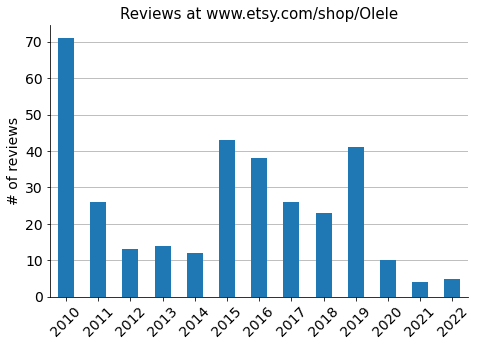

In [8]:
reviews_yearly = olele.groupby(olele.index.year)["name"].count()

# Plot
fig, ax = plt.subplots(figsize=(7.5, 5))

reviews_yearly.plot(ax=ax, kind="bar")

ax.grid(axis="y")
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=14, rotation=45)
ax.tick_params(axis='y', labelsize=14)
ax.set_title("Reviews at www.etsy.com/shop/Olele", size=15)
ax.set_xlabel("")
ax.set_ylabel("# of reviews", size=14)
sns.despine()

plt.show()

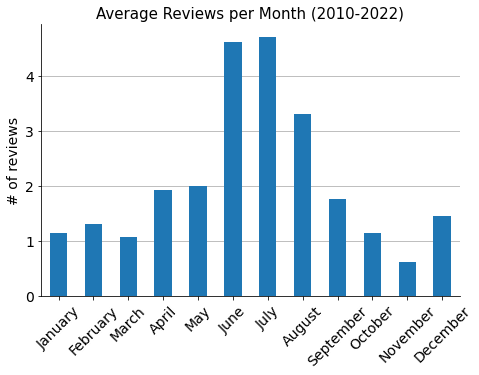

In [9]:
# Number of years
nbr_years = len(olele.index.year.unique())

# Montly average
reviews_monthly_avg = olele.groupby(olele.index.month)["name"].count() / nbr_years
reviews_monthly_avg

# Plot
fig, ax = plt.subplots(figsize=(7.5, 5))

reviews_monthly_avg.plot(ax=ax, kind="bar")

months = ['January', 'February', 'March', 'April', 'May', 'June',
          'July', 'August', 'September', 'October', 'November', 'December']
ax.grid(axis="y")
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=14, rotation=45)
ax.set_xticklabels(months, rotation=45)
ax.tick_params(axis='y', labelsize=14)
ax.set_title("Average Reviews per Month (2010-2022)", size=15)
ax.set_xlabel("")
ax.set_ylabel("# of reviews", size=14)
sns.despine()

plt.show()


In [10]:
# Top reviewers
reviewers = olele.value_counts("name")
reviewers

name
Anonymous     123
Cynthia        12
SamanthaMG     10
Catherine       6
Melissa         5
             ... 
Hola10          1
Heather         1
Genevieve       1
Gabrielle       1
福島 圭子           1
Length: 131, dtype: int64

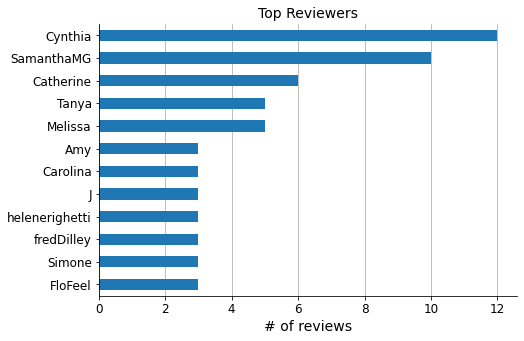

In [11]:
# Top reviewers: 3 reviews or more
reviewers_top = reviewers[1:13]

# Plot
fig, ax = plt.subplots(figsize=(7.5, 5))

reviewers_top.sort_values().plot(ax=ax, kind="barh")

ax.grid(axis="x")
ax.set_axisbelow(True)
ax.tick_params(axis='x', labelsize=12)
ax.tick_params(axis='y', labelsize=12)
ax.set_title("Top Reviewers", size=14)
ax.set_xlabel("# of reviews", fontsize=14)
ax.set_ylabel("")
sns.despine()

plt.show()

In [40]:
# Longest review
longest_review_index = olele["text"].str.len().sort_values(ascending=False).index[0]
olele[olele.index == longest_review_index]

,name,text
date,,
2020-03-22,Friedrich,I was looking for the perfect fan for a man li...


In [48]:
longest_review_full_text = list(olele[olele.index == longest_review_index]["text"])[0]
longest_review_full_text

"I was looking for the perfect fan for a man like me. Then I found Karmeles shop and this wonderfully beautiful accessory. And I was thrilled with him in a split of a second. Blue is my favorite color and the pattern immediately made me think of a night sky shining with thousands of stars. Bingo! Hit! It had to be! Karmele made the fan very clean and simply perfect. He is delivered in a very nice and fine dark blue leather pocket. So now I can keep him safely at all times. An absolutely perfect combination, in my opinion. I can't wait to use him on a sunny spring day. We had it yesterday, but with 5 degrees and cool wind... I am absolutely certain, that we will have warmer temperatures very soon. Now I wish Karmele continued success and that she and all her loved ones stay healthy. Kind regards, Friedrich"

## Sentiment analysis

### Rule/lexicon-based

In [33]:
!pip install textblob

In [34]:
# Import the required packages
from textblob import TextBlob

In [49]:
blob = TextBlob(longest_review_full_text)
blob.sentiment

Sentiment(polarity=0.49115150226757365, subjectivity=0.6157823129251702)

In [51]:
# for sentence in blob.sentences:
#     print(sentence.sentiment.polarity)

In [54]:
!pip install wordcloud

In [55]:
from wordcloud import WordCloud

In [56]:
cloud = WordCloud(background_color="white").generate(longest_review_full_text)

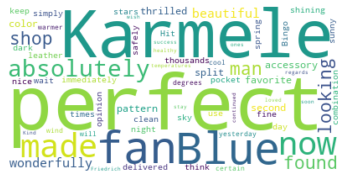

In [57]:
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()